In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("ex1data2.txt", header=None)

In [3]:
df.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [4]:
df.columns = ['size', 'No.of.beds', 'Price']
df.head()

,size,No.of.beds,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### feature normalization

In [5]:
df2 = (df - df.mean(axis=0))/df.std(axis=0)
df2.head()

,size,No.of.beds,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [6]:
X = df2.loc[:, ['size', 'No.of.beds']]
Y = df2.loc[:,'Price']

X.head()

,size,No.of.beds
0,0.130010,-0.223675
1,-0.504190,-0.223675
2,0.502476,-0.223675
3,-0.735723,-1.537767
4,1.257476,1.090417


In [7]:
# adding a column of ones to X
X['ones'] = 1
X = X[['ones', 'size', 'No.of.beds']]

In [8]:
# choosing some alpha value
alpha = 0.001
n_iter = 10000
m = df2.shape[0]

# initilize theta
theta = np.zeros([3,1])
Y = Y.reshape(Y.shape[0], 1)
J0 = 1/float(2*m)*np.sum((np.dot(X, theta) - Y)**2)
J = [J0]

for i in range(n_iter):
    theta = theta - alpha/float(m)*np.dot(X.T, (np.dot(X, theta) - Y))
    Ji = 1/float(2*m)*np.sum((np.dot(X, theta) - Y)**2)
    J.append(Ji)

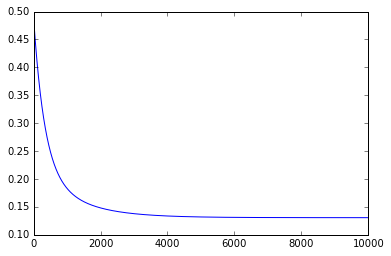

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(J)


In [10]:
# normal equation

theta_norm = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), Y)
theta_norm

array([[ -1.04083409e-16],
       [  8.84765988e-01],
       [ -5.31788197e-02]])

In [11]:
theta

array([[ -1.03003894e-16],
       [  8.78450989e-01],
       [ -4.68640133e-02]])

In [12]:
df.loc[:, 'Predicted_price'] = theta[0] + theta[1]*df.loc[:, 'size'] + theta[2]*df.loc[:, 'No.of.beds']
df.head(10)

,size,No.of.beds,Price,Predicted_price
0,2104,3,399900,1848.120289
1,1600,3,329900,1405.380991
2,2400,3,369000,2108.141782
3,1416,2,232000,1243.792873
4,3000,4,539900,2635.165511
5,1985,4,299900,1743.537757
6,1534,3,314900,1347.403225
7,1427,3,198999,1253.408969
8,1380,3,212000,1212.121773
9,1494,3,242500,1312.265186
